<a href="https://colab.research.google.com/github/tdack21/cosmologia_ml/blob/main/Tarea_7_cosmoml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 7. Cosmología con Machine Learning
Tonatiuh Sánchez Madrid

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve
from scipy.integrate import quad

1. **We start by assuming the components of the Universe behave as perfect fluids and hence  described by a barotropic equation of state $p_i=(\gamma_i-1)\rho_i c^2$, where i describes each fluid: radiation ($\gamma_r=4/3$), baryonic and dark matter ($\gamma_m=1$), and dark energy in the form of cosmological constant ($\gamma_{\Lambda}=0$). Once we introduce the dimensionless density parameters,defined as:
$$
\Omega_i=\frac{\kappa_0}{3H^2}\rho_i.
$$
 a) Show that the continuity equations (for all the fluids $i$) can be written as a dynamical system with the following form:
$$
\Omega'_i=3(\Pi-\gamma_i)\Omega_i,
$$
 with $\Pi=\sum_i\gamma_i\Omega_i$, and prime notation means derivative with respect to the e-fold parameter $N =ln(a)$.**

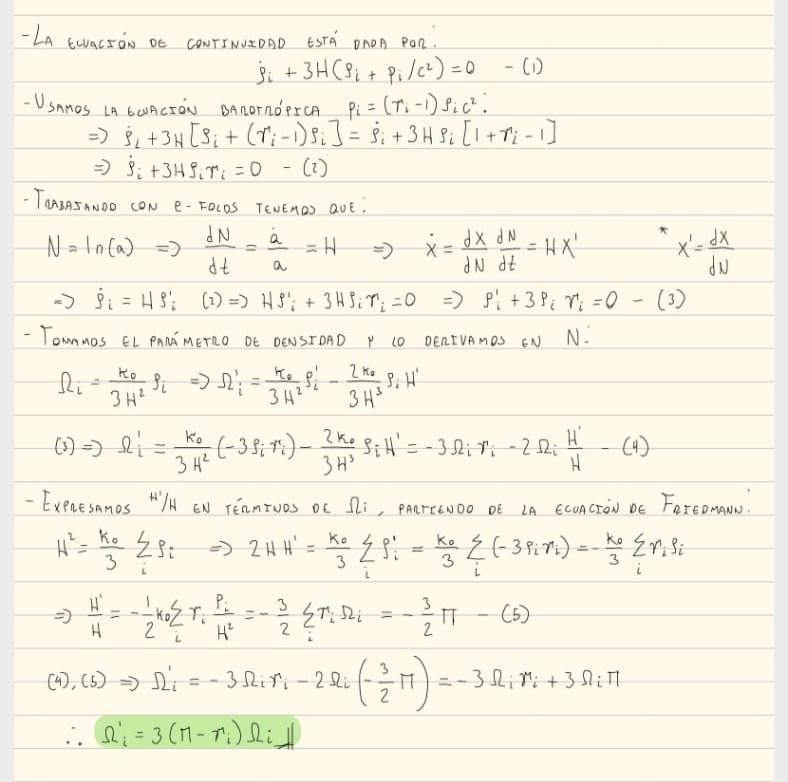

b) **Also, show that the Friedmann equation becomes a constraint for the density parameters at all time $∑_i\Omega_i=1$**.

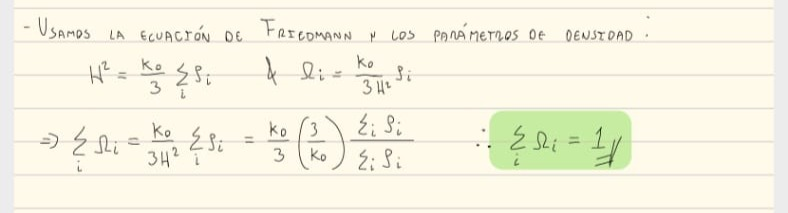

c) **Considering the initial conditions ($a=1$) $\Omega_{r,0}=10^{-4}$, $\Omega_{m,0}=0.3$, $\Omega_{k,0}=-0.01$, $H_0 = 68kms^{-1}Mpc$, with cosmological constant, solve explicitly the dynamical system (2) [hint: use odeint], along with the Friedmann constraint to get the following plot [hint: use matplotlib].**

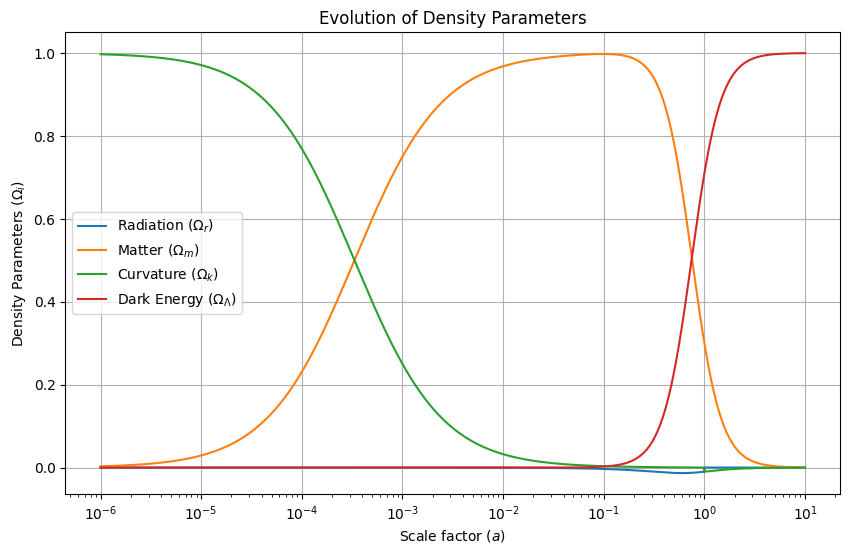

In [ ]:
# Define the gamma values
gamma_r = 4/3  # Radiation
gamma_m = 1    # Matter
gamma_k = 2/3  # Curvature
gamma_L = 0    # Cosmological constant

# Define the dynamical system
def system(y, N):
    Omega_r, Omega_m, Omega_k = y
    Pi = gamma_r * Omega_r + gamma_m * Omega_m + gamma_k * Omega_k + gamma_L * (1 - Omega_r - Omega_m - Omega_k)
    dOmega_r_dN = 3 * (Pi - gamma_r) * Omega_r
    dOmega_m_dN = 3 * (Pi - gamma_m) * Omega_m
    dOmega_k_dN = 3 * (Pi - gamma_k) * Omega_k
    return [dOmega_r_dN, dOmega_m_dN, dOmega_k_dN]

# Initial conditions
Omega_r0 = 1e-4
Omega_m0 = 0.3
Omega_k0 = -0.01
y0 = [Omega_r0, Omega_m0, Omega_k0]

# Define the range of N (e-fold parameter)
N_1 = np.linspace(0, np.log(10e-7), 10000)
N_2 = np.linspace(0, np.log(10), 1000)
N = np.concatenate((np.flip(N_1), N_2))

# Solve the system
sol_1 = odeint(system, y0, N_1)
sol_2 = odeint(system, y0, N_2)
sol = np.concatenate((np.flip(sol_1), sol_2))

# Extract solutions
Omega_r = sol[:, 0]
Omega_m = sol[:, 1]
Omega_k = sol[:, 2]
Omega_L = 1 - Omega_r - Omega_m - Omega_k  # Friedmann constraint

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(np.exp(N), Omega_r, label="Radiation ($\Omega_r$)")
plt.plot(np.exp(N), Omega_m, label="Matter ($\Omega_m$)")
plt.plot(np.exp(N), Omega_k, label="Curvature ($\Omega_k$)")
plt.plot(np.exp(N), Omega_L, label="Dark Energy ($\Omega_\Lambda$)")

plt.xlabel("Scale factor ($a$)")
plt.ylabel("Density Parameters ($\Omega_i$)")
plt.title("Evolution of Density Parameters")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.show()

 d) **The deceleration parameter is computed in terms of the contents of the universe, as $q=\frac{1}{2}\sum_i\Omega_i(1+3w_i)$. Use the solutions from above to plot $q(z)$, where $1+z=1/a$.**

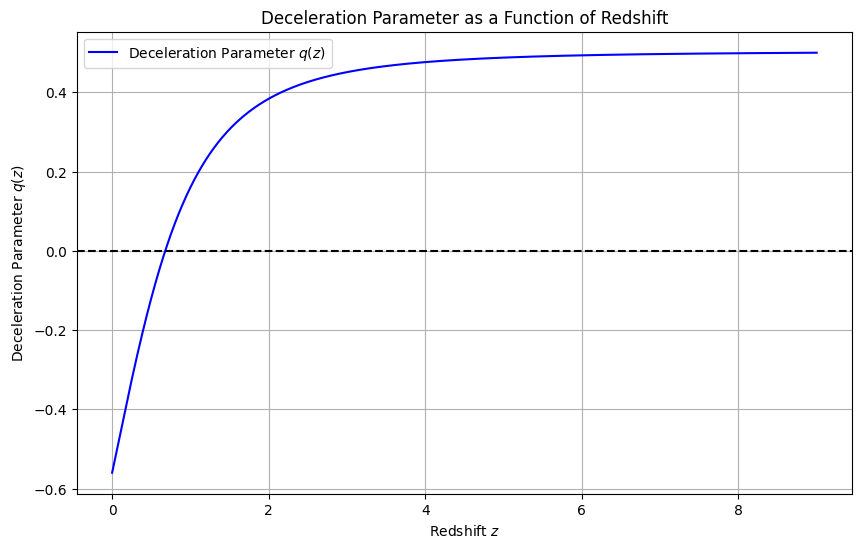

In [ ]:
w_r = 1/3    # Radiation
w_m = 0      # Matter
w_k = -1/3   # Curvature
w_L = -1     # Cosmological constant

N = np.linspace(0, np.log(10e-2), 10000)
z = np.exp(-N) - 1
sol = odeint(system, y0, N)

Omega_r = sol[:, 0]
Omega_m = sol[:, 1]
Omega_k = sol[:, 2]
Omega_L = 1 - Omega_r - Omega_m - Omega_k

# Compute the deceleration parameter q(z)
q = 0.5 * (Omega_r * (1 + 3 * w_r) +
      Omega_m * (1 + 3 * w_m) +
      Omega_k * (1 + 3 * w_k) +
      Omega_L * (1 + 3 * w_L))

# Plot q(z)
plt.figure(figsize=(10, 6))
plt.plot(z, q, label="Deceleration Parameter $q(z)$", color="blue")
plt.xlabel("Redshift $z$")
plt.ylabel("Deceleration Parameter $q(z)$")
plt.title("Deceleration Parameter as a Function of Redshift")
plt.legend()
plt.grid(True)
plt.axhline(y=0, color="black", linestyle="--", label="$q = 0$")
plt.show()

2. **A step further to the standard model is to consider the dark energy being dynamic, where the evolution of its EoS is usually parameterised. A commonly used form of $w(z)$ is to take into account the next contribution of a Taylor expansion in terms of the scale factor $w(a)=w_0+(1-a)w_a$ or in terms of redshift $w(z)=w_0 + \frac{z}{1+z}w_a$; we refer to this model as CPL. The parameters $w_0$ and $w_a$ are real numbers such that at the present epoch $w|_{z=0}=w_0$ and $dw/dz|_{z=0}=-w_a$;we recover $\Lambda$CDM when $w_0=1$ and $w_a=0$.**

 a) **Show the Friedmann equation for the CPL parameterisation turns out to be:**
$$
\frac{H^2(z)}{H^2_0}=\Omega_{m,0}(1+z)^3+\Omega_{k,0}(1+z)^2+(1-\Omega_{m,0}-\Omega_{k,0})(1+z)^{3(1+w_0+w_a)}e^{-\frac{3w_az}{1+z}}.
$$

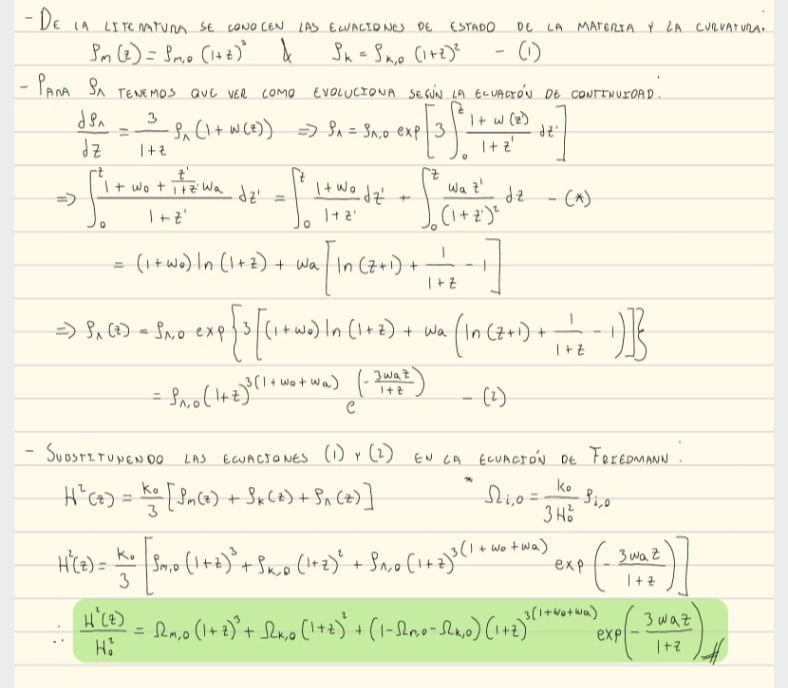

b) **Repeat the same process in a), but now use the equation of state $w(z)=w0+waln(1+z)$.**

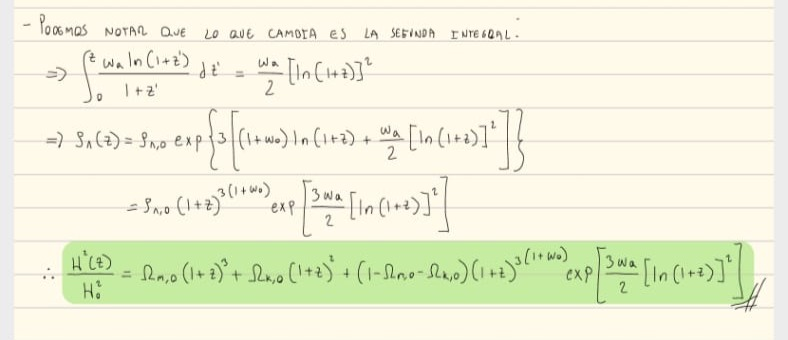

  Consider the Universe from the previous exercise.

The comoving distance $d_c$ is defined as:
$$
\chi_e=c\int_t^{t_0} \frac{dt}{R(t)}= \frac{c}{R_0} \int_0^z \frac{dz}{H(z)}.
$$

The luminosity distance dL is given by:
$$
d_L=(1+z)R_0S_k(\chi).
$$

The angular distance is given by:
$$
d_A=\frac{R_0S_k(\chi)}{(1+z)},
$$

where:
$$
R_0=h_0^{-1}\sqrt{-k/\Omega_{k,0}}=\frac{H_0^{-1}}{\sqrt{|\Omega_{k,0}|}}.
$$

3. **By using the initial conditions from the previous homework (but $k=0$), plot the Comoving distance $d_c$, luminosity distance $d_L$, and angular distance $d_A$ for the $ΛCDM$ model.**

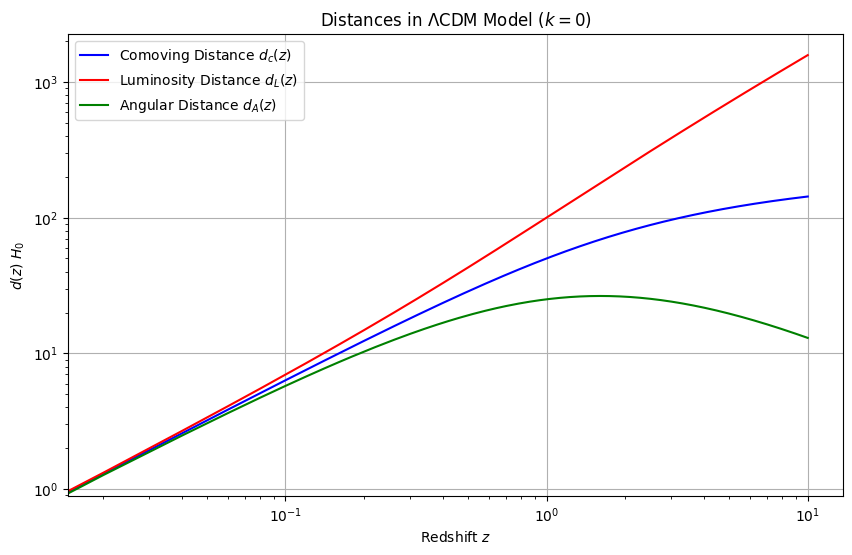

In [13]:
c = 3e5  # Speed of light in km/s
H0 = 68  # Hubble constant in km/s/Mpc
Omega_m0 = 0.3  # Matter density parameter
Omega_L0 = 0.7  # Dark energy density parameter

# Hubble parameter function E(z)
def E(z):
    return np.sqrt(Omega_m0 * (1 + z)**3 + Omega_L0)

# Comoving distance dc(z)
def dc(z):
    integral, _ = quad(lambda z_prime: 1 / E(z_prime), 0, z)
    return (c / H0) * integral

# Luminosity distance dL(z)
def dL(z):
    return (1 + z) * dc(z)

# Angular distance dA(z)
def dA(z):
    return dc(z) / (1 + z)

z = np.linspace(0, 10, 500)  # From z = 0 to z = 5

dc_values = np.array([dc(zi) for zi in z])
dL_values = np.array([dL(zi) for zi in z])
dA_values = np.array([dA(zi) for zi in z])

plt.figure(figsize=(10, 6))
plt.plot(z, dc_values/H0, label="Comoving Distance $d_c(z)$", color="blue")
plt.plot(z, dL_values/H0, label="Luminosity Distance $d_L(z)$", color="red")
plt.plot(z, dA_values/H0, label="Angular Distance $d_A(z)$", color="green")

plt.xlabel("Redshift $z$")
plt.ylabel("$d(z)$ $H_0$")
plt.title("Distances in $\Lambda$CDM Model ($k = 0$)")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.show()

b) **Now using the CPL parameterisation, plot these three distances for [$w_0=0.9$, $w_a=0.5$] and [$w_0=−1.1$, $w_a=−0.5$].**

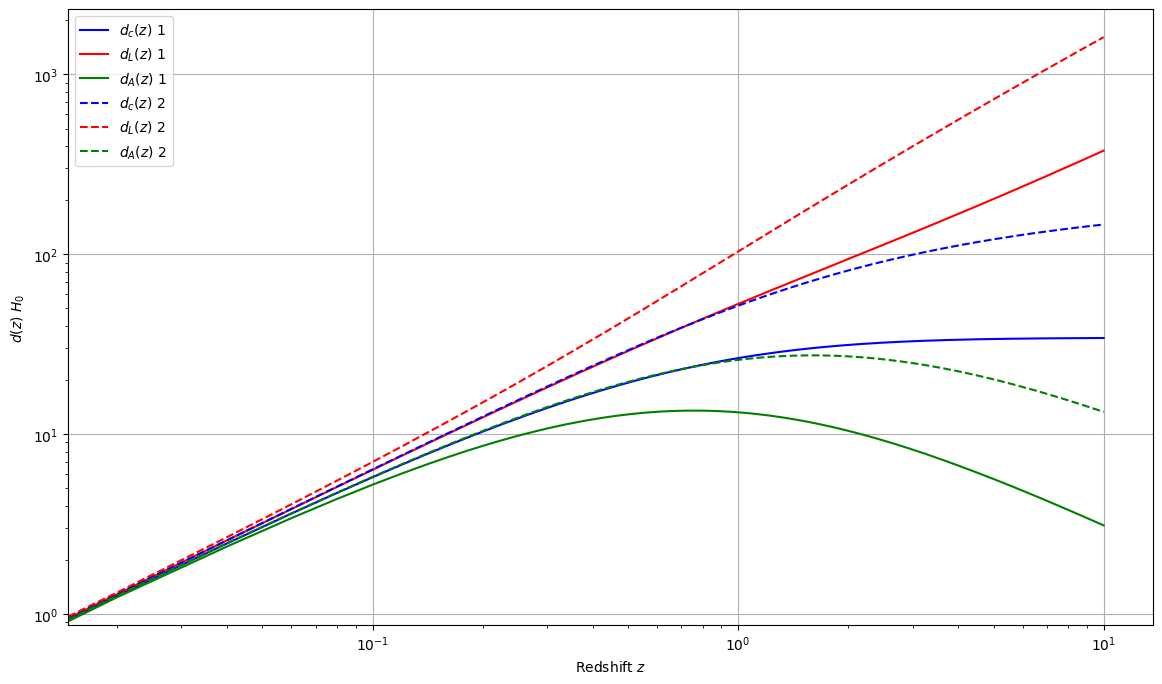

In [27]:
c = 3e5  # Speed of light in km/s
H0 = 68  # Hubble constant in km/s/Mpc
Omega_m0 = 0.3  # Matter density parameter
Omega_L0 = 0.7  # Dark energy density parameter

# CPL parameterization for w(z)
def w(z, w0, wa):
    return w0 + wa * (z / (1 + z))

# Hubble parameter function E(z) for CPL
def E(z, w0, wa):
    return np.sqrt(Omega_m0 * (1 + z)**3 + Omega_L0 * (1 + z)**(3 * (1 + w0 + wa)) * np.exp(-3 * wa * z / (1 + z)))

# Comoving distance dc(z)
def dc(z, w0, wa):
    integral, _ = quad(lambda z_prime: 1 / E(z_prime, w0, wa), 0, z)
    return (c / H0) * integral

# Luminosity distance dL(z)
def dL(z, w0, wa):
    return (1 + z) * dc(z, w0, wa)

# Angular distance dA(z)
def dA(z, w0, wa):
    return dc(z, w0, wa) / (1 + z)

# Redshift range
z = np.linspace(0, 10, 500)  # From z = 0 to z = 5

# Parameters for CPL
w0_1, wa_1 = 0.9, 0.5  # First set of parameters
w0_2, wa_2 = -1.1, -0.5  # Second set of parameters

# Compute distances for both sets of parameters
dc_values_1 = np.array([dc(zi, w0_1, wa_1) for zi in z])
dL_values_1 = np.array([dL(zi, w0_1, wa_1) for zi in z])
dA_values_1 = np.array([dA(zi, w0_1, wa_1) for zi in z])

dc_values_2 = np.array([dc(zi, w0_2, wa_2) for zi in z])
dL_values_2 = np.array([dL(zi, w0_2, wa_2) for zi in z])
dA_values_2 = np.array([dA(zi, w0_2, wa_2) for zi in z])

plt.figure(figsize=(14, 8))

# Plot for w0 = 0.9, wa = 0.5
plt.plot(z, dc_values_1/H0, label="$d_c(z)$ 1", color="blue")
plt.plot(z, dL_values_1/H0, label="$d_L(z)$ 1", color="red")
plt.plot(z, dA_values_1/H0, label="$d_A(z)$ 1", color="green")
plt.xlabel("Redshift $z$")
plt.ylabel("$d(z)$ $H_0$")

# Plot for w0 = -1.1, wa = -0.5
plt.plot(z, dc_values_2/H0, label="$d_c(z)$ 2", color="blue", linestyle='dashed')
plt.plot(z, dL_values_2/H0, label="$d_L(z)$ 2", color="red", linestyle='dashed')
plt.plot(z, dA_values_2/H0, label="$d_A(z)$ 2", color="green", linestyle='dashed')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

c) **Repeat the same process in b), but now use the equation of state $w(z)=w_0+w_aln(1+z)$ (with same combinations of w0 and wa)**.

As part of some models that allow deviations from $ΛCDM$ we also use the polynomial-$CDM$ model, that can be thought as a parameterisation of the Hubble function. This model has the following Friedmann equation:
$$
\frac{H^2(z)}{H_0^2}=Ω_{m,0}(1+z)^3+(Ω_{1,0}+Ω_{k,0})(1+z)^2+Ω_{2,0}(1+z)^1+(1-Ω_{m,0}+Ω_{1,0}+Ω_{2,0}+Ω_{k,0}),
$$
where $Ω_{1,0}$ and $Ω_{2,0}$ are two additional parameters, which within the $ΛCDM$ both of them remain absent ($Ω_{1,0}=0$ and $Ω_{2,0}=0$). Nevertheless, $Ω_{2,0}$ could be interpreted as a "missing matter" component introduced to allow a symmetry that relates the big bang to the future conformal singularity.

4. **By using the initial conditions from the previous homework (but $k=0$), plot the Comoving distance $d_c$, luminosity distance $d_L$, and angular distance $d_A$ for [$Ω_{1,0}=0.2$,$Ω_{2,0}=-0.2$] and [$Ω_{1,0}=-0.2$,$Ω_{2,0}=0.2$]**.

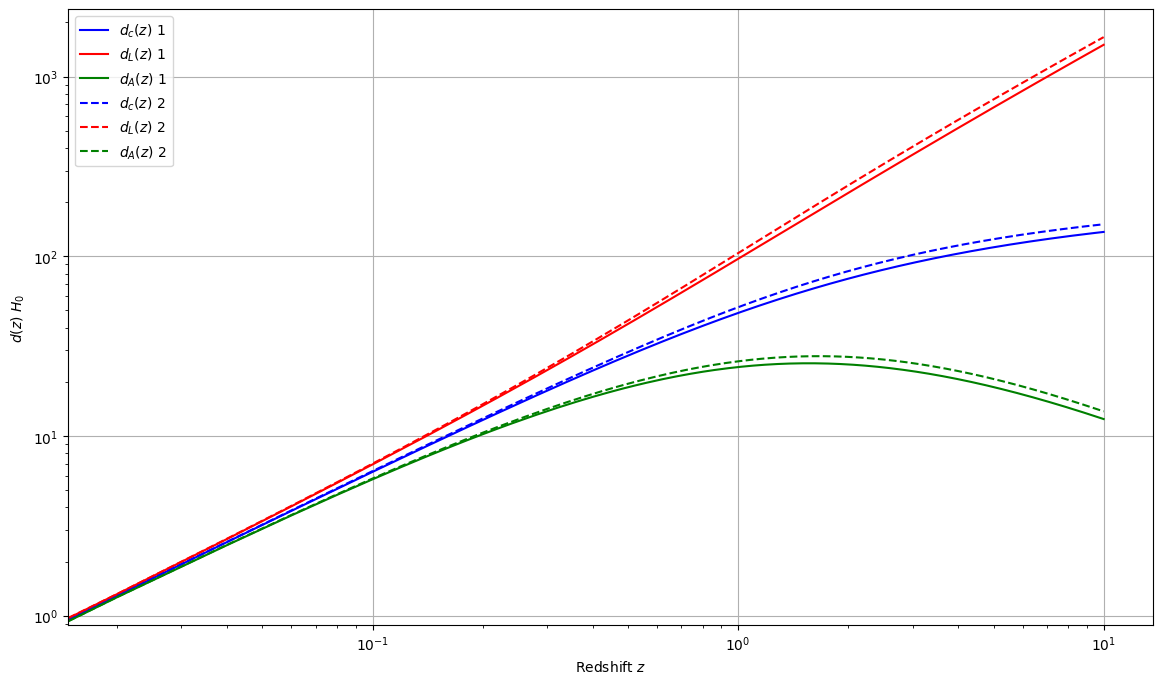

In [31]:
c = 3e5  # Speed of light in km/s
H0 = 68  # Hubble constant in km/s/Mpc
Omega_m0 = 0.3  # Matter density parameter

# Hubble parameter function E(z)
def E(z, Omega1, Omega2):
    return np.sqrt(Omega_m0 * (1 + z)**3 + Omega1 * (1 + z)**2 + Omega2 * (1 + z) + (1 - Omega_m0 + Omega1 + Omega2))

# Comoving distance dc(z)
def dc(z, Omega1, Omega2):
    integral, _ = quad(lambda z_prime: 1 / E(z_prime, Omega1, Omega2), 0, z)
    return (c / H0) * integral

# Luminosity distance dL(z)
def dL(z, Omega1, Omega2):
    return (1 + z) * dc(z, Omega1, Omega2)

# Angular distance dA(z)
def dA(z, Omega1, Omega2):
    return dc(z, Omega1, Omega2) / (1 + z)

# Redshift range
z = np.linspace(0, 10, 500)  # From z = 0 to z = 5

# Parameters for the two cases
Omega1_1, Omega2_1 = 0.2, -0.2  # First set of parameters
Omega1_2, Omega2_2 = -0.2, 0.2  # Second set of parameters

# Compute distances for both sets of parameters
dc_values_1 = np.array([dc(zi, Omega1_1, Omega2_1) for zi in z])
dL_values_1 = np.array([dL(zi, Omega1_1, Omega2_1) for zi in z])
dA_values_1 = np.array([dA(zi, Omega1_1, Omega2_1) for zi in z])

dc_values_2 = np.array([dc(zi, Omega1_2, Omega2_2) for zi in z])
dL_values_2 = np.array([dL(zi, Omega1_2, Omega2_2) for zi in z])
dA_values_2 = np.array([dA(zi, Omega1_2, Omega2_2) for zi in z])

plt.figure(figsize=(14, 8))

# Plot for Omega1 = 0.2, Omega2 = -0.2
plt.plot(z, dc_values_1/H0, label="$d_c(z)$ 1", color="blue")
plt.plot(z, dL_values_1/H0, label="$d_L(z)$ 1", color="red")
plt.plot(z, dA_values_1/H0, label="$d_A(z)$ 1", color="green")
plt.xlabel("Redshift $z$")
plt.ylabel("$d(z)$ $H_0$")

# Plot for Omega1 = -0.2, Omega2 = 0.2
plt.plot(z, dc_values_2/H0, label="$d_c(z)$ 2", color="blue", linestyle='dashed')
plt.plot(z, dL_values_2/H0, label="$d_L(z)$ 2", color="red", linestyle='dashed')
plt.plot(z, dA_values_2/H0, label="$d_A(z)$ 2", color="green", linestyle='dashed')
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

5. **As a final step, use the exercise 3) b) (CPL, with the two combinations of parameters) to plot the data from Cosmic Chronometers ($H(z)$), Supernovae ($d_L$), BAO ($d_H$, $d_M$, $d_V$) along their distances.**

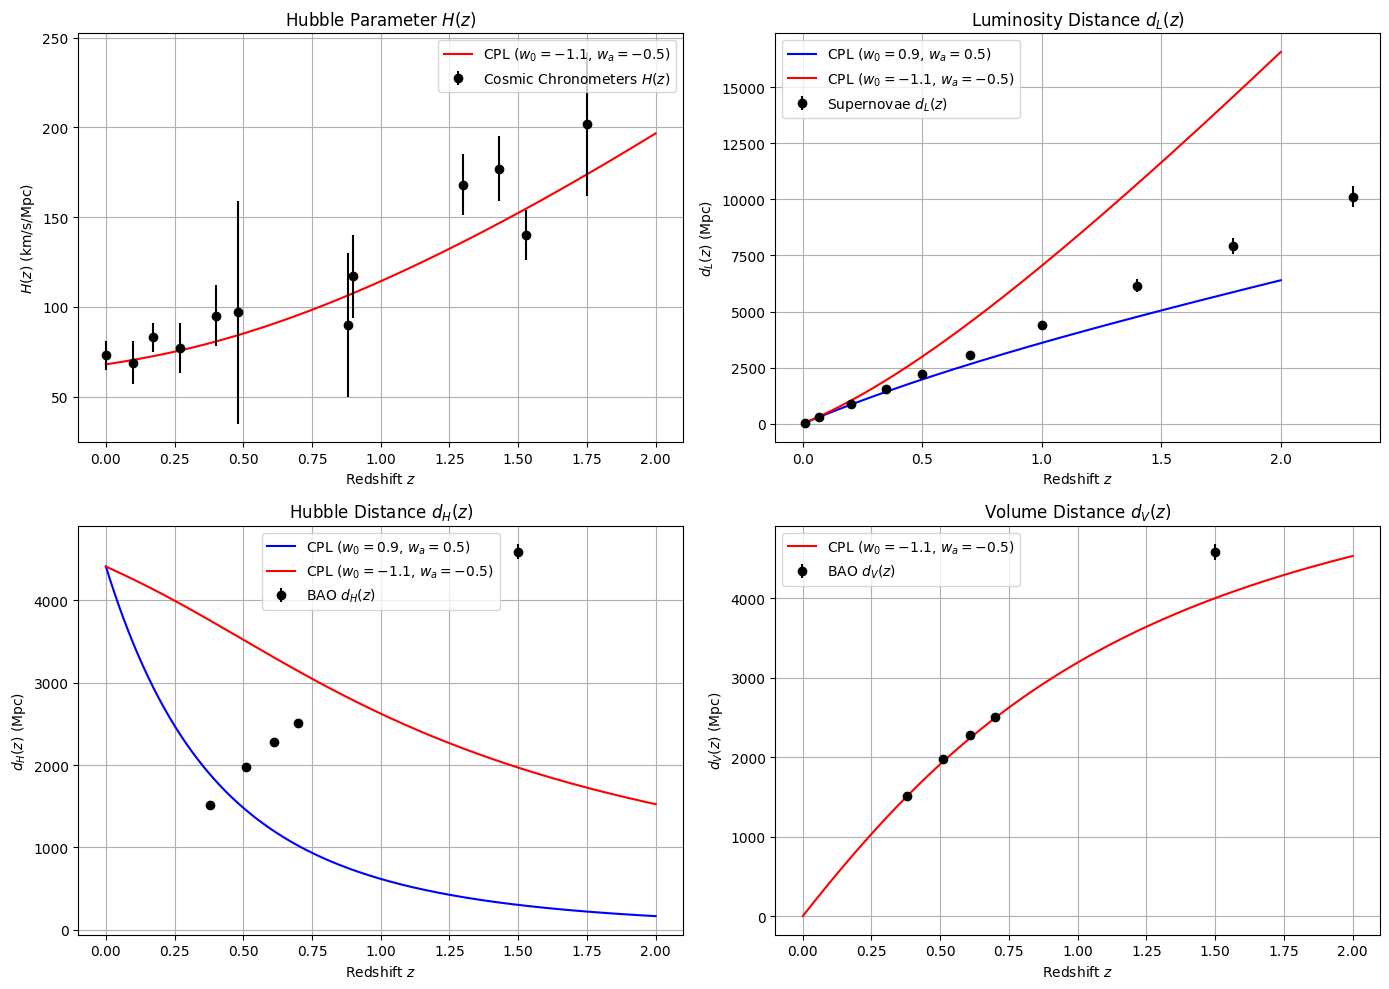

In [9]:
c = 3e5  # Speed of light in km/s
H0 = 68  # Hubble constant in km/s/Mpc
Omega_m0 = 0.3  # Matter density parameter
Omega_L0 = 0.7  # Dark energy density parameter

# CPL parameterization for w(z)
def w(z, w0, wa):
    return w0 + wa * (z / (1 + z))

# Hubble parameter function E(z) for CPL
def E(z, w0, wa):
    return np.sqrt(Omega_m0 * (1 + z)**3 + Omega_L0 * (1 + z)**(3 * (1 + w0 + wa)) * np.exp(-3 * wa * z / (1 + z)))

# Comoving distance dc(z)
def dc(z, w0, wa):
    integral, _ = quad(lambda z_prime: 1 / E(z_prime, w0, wa), 0, z)
    return (c / H0) * integral

# Luminosity distance dL(z)
def dL(z, w0, wa):
    return (1 + z) * dc(z, w0, wa)

# Angular distance dA(z)
def dA(z, w0, wa):
    return dc(z, w0, wa) / (1 + z)

# Hubble distance dH(z)
def dH(z, w0, wa):
    return c / (H0 * E(z, w0, wa))

# Volume distance dV(z)
def dV(z, w0, wa):
    dM = (1 + z) * dA(z, w0, wa)
    return (z*dM**2 * dH(z, w0, wa))**(1/3)

# Redshift range
z = np.linspace(0, 2, 500)  # From z = 0 to z = 2

# Parameters for CPL
w0_1, wa_1 = 0.9, 0.5  # First set of parameters
w0_2, wa_2 = -1.1, -0.5  # Second set of parameters

# Compute distances for both sets of parameters
dc_values_1 = np.array([dc(zi, w0_1, wa_1) for zi in z])
dL_values_1 = np.array([dL(zi, w0_1, wa_1) for zi in z])
dA_values_1 = np.array([dA(zi, w0_1, wa_1) for zi in z])
dH_values_1 = np.array([dH(zi, w0_1, wa_1) for zi in z])
dV_values_1 = np.array([dV(zi, w0_1, wa_1) for zi in z])

dc_values_2 = np.array([dc(zi, w0_2, wa_2) for zi in z])
dL_values_2 = np.array([dL(zi, w0_2, wa_2) for zi in z])
dA_values_2 = np.array([dA(zi, w0_2, wa_2) for zi in z])
dH_values_2 = np.array([dH(zi, w0_2, wa_2) for zi in z])
dV_values_2 = np.array([dV(zi, w0_2, wa_2) for zi in z])

# Cosmic Chronometers H(z)
z_H = np.array([0, 0.1, 0.17, 0.27, 0.4, 0.48, 0.88, 0.9, 1.3, 1.43, 1.53, 1.75])
H_obs = np.array([73, 69, 83, 77, 95, 97, 90, 117, 168, 177, 140, 202])
H_err = np.array([8, 12, 8, 14, 17, 62, 40, 23, 17, 18, 14, 40])

# Datos de Supernovas (Pantheon)
z_SN = np.array([0.01, 0.07, 0.20, 0.35, 0.50, 0.70, 1.00, 1.40, 1.80, 2.30])
dL_SN = np.array([44.0, 308.0, 880.0, 1540.0, 2200.0, 3080.0, 4400.0, 6160.0, 7920.0, 10120.0])
dL_err = np.array([2.0, 14.0, 40.0, 70.0, 100.0, 140.0, 200.0, 280.0, 360.0, 460.0])

# Datos de BAO (BOSS/eBOSS)
z_BAO = np.array([0.38, 0.51, 0.61, 0.70, 1.50])
dH_BAO = np.array([1518.0, 1977.0, 2283.0, 2516.0, 4590.0])
dM_BAO = np.array([1512.0, 1975.0, 2280.0, 2510.0, 4580.0])
dV_BAO = np.array([1515.0, 1976.0, 2282.0, 2513.0, 4585.0])
dH_err = np.array([22.0, 27.0, 32.0, 35.0, 90.0])
dM_err = np.array([25.0, 30.0, 35.0, 40.0, 100.0])
dV_err = np.array([20.0, 28.0, 33.0, 38.0, 95.0])

# Plot the results
plt.figure(figsize=(14, 10))

# Plot H(z)
plt.subplot(2, 2, 1)
#plt.plot(z, H0 * E(z, w0_1, wa_1), label="CPL ($w_0 = 0.9$, $w_a = 0.5$)", color="blue")
plt.plot(z, H0 * E(z, w0_2, wa_2), label="CPL ($w_0 = -1.1$, $w_a = -0.5$)", color="red")
plt.errorbar(z_H, H_obs, yerr=H_err, fmt="o", color="black", label="Cosmic Chronometers $H(z)$")
plt.xlabel("Redshift $z$")
plt.ylabel("$H(z)$ (km/s/Mpc)")
plt.title("Hubble Parameter $H(z)$")
plt.legend()
plt.grid(True)

# Plot dL(z)
plt.subplot(2, 2, 2)
plt.plot(z, dL_values_1, label="CPL ($w_0 = 0.9$, $w_a = 0.5$)", color="blue")
plt.plot(z, dL_values_2, label="CPL ($w_0 = -1.1$, $w_a = -0.5$)", color="red")
plt.errorbar(z_SN, dL_SN, yerr=dL_err, fmt="o", color="black", label="Supernovae $d_L(z)$")
plt.xlabel("Redshift $z$")
plt.ylabel("$d_L(z)$ (Mpc)")
plt.title("Luminosity Distance $d_L(z)$")
plt.legend()
plt.grid(True)

# Plot BAO distances
plt.subplot(2, 2, 3)
plt.plot(z, dH_values_1, label="CPL ($w_0 = 0.9$, $w_a = 0.5$)", color="blue")
plt.plot(z, dH_values_2, label="CPL ($w_0 = -1.1$, $w_a = -0.5$)", color="red")
plt.errorbar(z_BAO, dH_BAO, yerr=dH_err, fmt="o", color="black", label="BAO $d_H(z)$")
plt.xlabel("Redshift $z$")
plt.ylabel("$d_H(z)$ (Mpc)")
plt.title("Hubble Distance $d_H(z)$")
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
#plt.plot(z, dV_values_1, label="CPL ($w_0 = 0.9$, $w_a = 0.5$)", color="blue")
plt.plot(z, dV_values_2, label="CPL ($w_0 = -1.1$, $w_a = -0.5$)", color="red")
plt.errorbar(z_BAO, dV_BAO, yerr=dV_err, fmt="o", color="black", label="BAO $d_V(z)$")
plt.xlabel("Redshift $z$")
plt.ylabel("$d_V(z)$ (Mpc)")
plt.title("Volume Distance $d_V(z)$")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()